# Question 2

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [100]:
df_matrix_test = pd.read_csv("matrix_1kg.txt", usecols=lambda column:column not in ["CHROM", "REF","ALT", "POS"],
                       sep = "\t")
###df_matrix_test

In [101]:
total_variations = np.sum(df_matrix_test, axis=1)
###total_variations

In [102]:
first_column = df_matrix_test.iloc[:,0]
###print(first_column)

In [103]:
alternative_allele_frequency=(total_variations/(2*df_matrix_test.shape[1]))
###print(alternative_allele_frequency)

Text(0.5, 1.0, 'Alternate allele frequency')

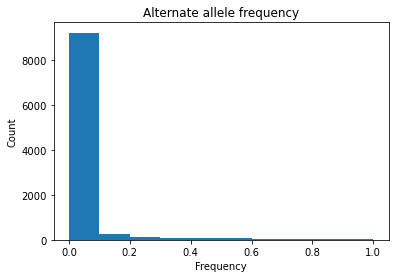

In [47]:
plt.hist(alternative_allele_frequency)
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.title("Alternate allele frequency")

# Question 3

In [104]:
allele_dict= {}

for i,v in enumerate(alternative_allele_frequency):
    allele_dict[i] = v
    
##print(allele_dict)

##d = dict(enumerate(alternative_allele_frequency))
##print(alternative_allele_frequency)
##print(d)

keys = list(allele_dict.keys())
for k in keys:
    
    if allele_dict[k] < 0.05 or allele_dict[k] > 0.95:
        
        del allele_dict[k]

keys2 = list(allele_dict.keys())

common_variation = df_matrix_test.iloc[keys2]       
##print(allele_dict)
###print(common_variation)

# Question 4

In [105]:
pca_input = df_matrix_test.T

###print(pca_input.mean(axis=0))
###print(pca_input.var(axis=0))

pca_input_standardized= StandardScaler().fit_transform(pca_input)

###print(pca_input_standardized.mean(axis=0))
###print(pca_input_standardized.var(axis=0))

In [106]:
pca = PCA(n_components = 2)
pca_output = pca.fit_transform(pca_input_standardized)
###pca_output

In [107]:
pca_output_df=pd.DataFrame(data=pca_output, columns=['PC1', 'PC2'])
###pca_output_df

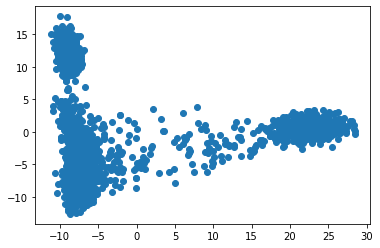

In [72]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])

In [108]:
##df_matrix2 = pd.read_csv("/Users/cmdb/qbb2020-answers/Day2-Homework/matrix_1kg.txt", 
  ##                       skiprows =1, 
    ##                   sep = "\t")
##df_matrix2

# Question 5 and 6

In [109]:
df_metadata = pd.read_csv("/Users/cmdb/Downloads/integrated_call_samples_v3.20130502.ALL.panel", sep='\t')
###df_metadata

In [110]:
pca_output_df['sample'] = pca_input.index
###pca_output_df

In [75]:
pca_output_df2 = pd.merge(pca_output_df, df_metadata, on = "sample")

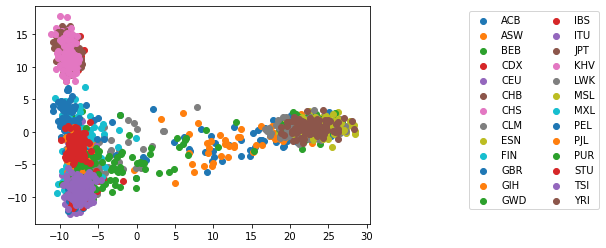

In [78]:
fig, ax = plt.subplots()
population = pca_output_df2.groupby("pop")
for name, group in population:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol =2)

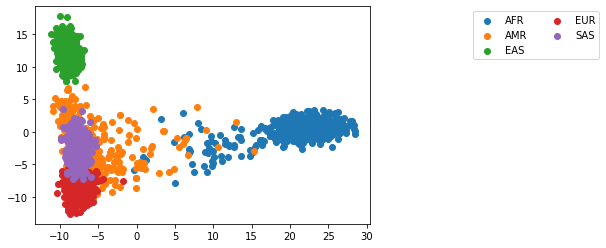

In [79]:
fig, ax = plt.subplots()
superpopulation = pca_output_df2.groupby("super_pop")
for name, group in superpopulation:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol =2)

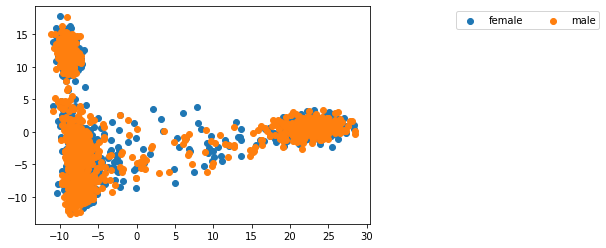

In [80]:
fig, ax = plt.subplots()
gender = pca_output_df2.groupby("gender")
for name, group in gender:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol =2)

# Question 7

In [111]:
pca_input = df_matrix_test.T

###print(pca_input.mean(axis=0))
###print(pca_input.var(axis=0))

pca_input_standardized= StandardScaler().fit_transform(pca_input)

###print(pca_input_standardized.mean(axis=0))
###print(pca_input_standardized.var(axis=0))

In [112]:
pca = PCA(n_components = 3)
pca_output = pca.fit_transform(pca_input_standardized)
###pca_output

In [113]:
pca_output_df=pd.DataFrame(data=pca_output, columns=['PC1', 'PC2', 'PC3'])
###pca_output_df

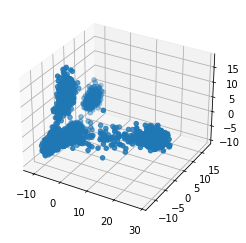

In [99]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = pca_output_df['PC1'],
               ys = pca_output_df['PC2'],
               zs = pca_output_df['PC3'])

##fig, ax = plt.subplots()
##ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'], z = pca_output_df['PC3'])